In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October          

In [4]:
num_bins = 2

bed_days_min = filtered_data3['Severity'].min()
bed_days_max = filtered_data3['Severity'].max()

bin_width = (bed_days_max - bed_days_min) / num_bins
bins = [bed_days_min + i * bin_width for i in range(num_bins + 1)]

def bin_function(x):
    for i in range(1, len(bins)):
        if x <= bins[i]:
            return i - 1
    return i

filtered_data3['Bed_days_category'] = filtered_data3['Severity'].apply(bin_function)

/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_2056/220732921.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data3['Bed_days_category'] = filtered_data3['Severity'].apply(bin_function)


In [5]:
filtered_data3['Bed_days_category'].value_counts()


Bed_days_category
0    10897
1      330
Name: count, dtype: int64

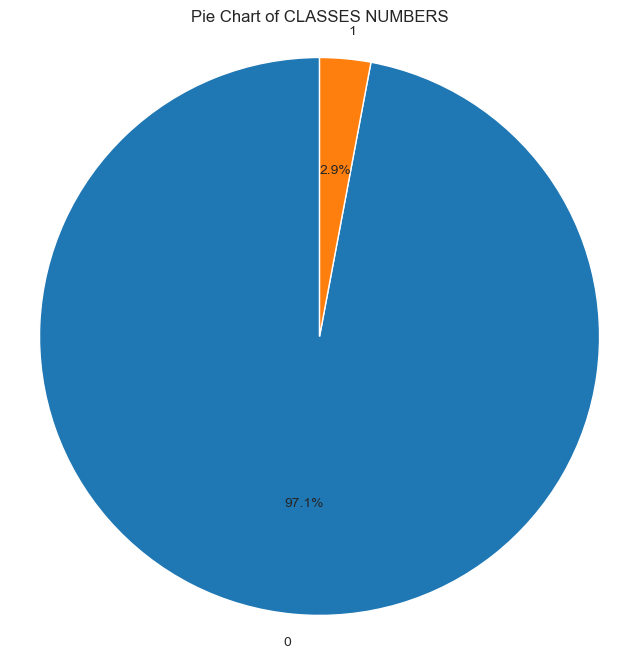

In [6]:
import matplotlib.pyplot as plt

value_counts = filtered_data3['Bed_days_category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Pie Chart of CLASSES NUMBERS')
plt.show()

In [7]:
from xgboost import XGBClassifier

X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   
                   'Male','Female',
                   
                   'Regional','MajorCities',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']]



y = filtered_data3['Bed_days_category']

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)

Confusion Matrix for Fold 1:
 [[1080   10]
 [   7   26]]
Confusion Matrix for Fold 2:
 [[1083    7]
 [  10   23]]
Confusion Matrix for Fold 3:
 [[1077   13]
 [   2   31]]
Confusion Matrix for Fold 4:
 [[1078   12]
 [   6   27]]
Confusion Matrix for Fold 5:
 [[1080   10]
 [   9   24]]
Confusion Matrix for Fold 6:
 [[1081    9]
 [  11   22]]
Confusion Matrix for Fold 7:
 [[1086    4]
 [   9   24]]
Confusion Matrix for Fold 8:
 [[1084    5]
 [  11   22]]
Confusion Matrix for Fold 9:
 [[1080    9]
 [  15   18]]
Confusion Matrix for Fold 10:
 [[1086    3]
 [   7   26]]
Mean Accuracy: 0.9849470558076707
Accuracy Std Dev: 0.003248155845934511
Mean Precision: 0.753647787080032
Precision Std Dev: 0.07347483849586244
Mean Recall: 0.7363636363636364
Recall Std Dev: 0.1005494546850731
Mean F1-score: 0.7401822890861421
F1-score Std Dev: 0.06287376899573655
Mean Confusion Matrix:
 [[1081.5    8.2]
 [   8.7   24.3]]


In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from xgboost import XGBClassifier

# تعداد فولدها
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
uncertainty_list = []
risk_weighted_accuracy_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # 1. فیت کردن مدل اصلی
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # 2. کالیبره کردن مدل فیت شده
    calibrated_model = CalibratedClassifierCV(xgb_model, method='isotonic', cv=5)
    calibrated_model.fit(X_train, y_train)
    
    # 3. پیش‌بینی با مدل کالیبره شده
    y_pred_calibrated = calibrated_model.predict(X_test)
    y_prob_calibrated = calibrated_model.predict_proba(X_test)
    
    # 4. محاسبه عدم قطعیت به عنوان واریانس در احتمال‌های پیش‌بینی شده
    uncertainty = np.mean(np.var(y_prob_calibrated, axis=1))
    uncertainty_list.append(uncertainty)
    
    # 5. محاسبه دقت وزنی بر اساس ریسک
    risk_weighted_accuracy = accuracy_score(y_test, y_pred_calibrated) * (1 - uncertainty)
    risk_weighted_accuracy_list.append(risk_weighted_accuracy)
    
    # 6. محاسبه معیارهای کلاسیک
    accuracy_list.append(accuracy_score(y_test, y_pred_calibrated))
    precision_list.append(precision_score(y_test, y_pred_calibrated))
    recall_list.append(recall_score(y_test, y_pred_calibrated))
    f1_list.append(f1_score(y_test, y_pred_calibrated))
    
    # 7. محاسبه و ذخیره ماتریس سردرگمی
    conf_matrix = confusion_matrix(y_test, y_pred_calibrated)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# 8. محاسبه میانگین و انحراف معیار هر معیار
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)
mean_uncertainty = np.mean(uncertainty_list)
std_uncertainty = np.std(uncertainty_list)
mean_risk_weighted_accuracy = np.mean(risk_weighted_accuracy_list)
std_risk_weighted_accuracy = np.std(risk_weighted_accuracy_list)

# 9. محاسبه میانگین ماتریس سردرگمی
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

# 10. چاپ نتایج
print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Uncertainty:', mean_uncertainty)
print('Uncertainty Std Dev:', std_uncertainty)
print('Mean Risk-Weighted Accuracy:', mean_risk_weighted_accuracy)
print('Risk-Weighted Accuracy Std Dev:', std_risk_weighted_accuracy)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1064   26]
 [   1   32]]
Confusion Matrix for Fold 2:
 [[1059   31]
 [   1   32]]
Confusion Matrix for Fold 3:
 [[1057   33]
 [   1   32]]
Confusion Matrix for Fold 4:
 [[1066   24]
 [   2   31]]
Confusion Matrix for Fold 5:
 [[1067   23]
 [   2   31]]
Confusion Matrix for Fold 6:
 [[1061   29]
 [   1   32]]
Confusion Matrix for Fold 7:
 [[1074   16]
 [   4   29]]
Confusion Matrix for Fold 8:
 [[1063   26]
 [   2   31]]
Confusion Matrix for Fold 9:
 [[1061   28]
 [   0   33]]
Confusion Matrix for Fold 10:
 [[1076   13]
 [   0   33]]
Mean Accuracy: 0.9765751115470879
Accuracy Std Dev: 0.005115081239826882
Mean Precision: 0.5660947944292554
Precision Std Dev: 0.06401567046260212
Mean Recall: 0.9575757575757576
Recall Std Dev: 0.033744026441394064
Mean F1-score: 0.7091114121017111
F1-score Std Dev: 0.04838917360690805
Mean Uncertainty: 0.23933333521945016
Uncertainty Std Dev: 0.0010708612522439074
Mean Risk-Weighted Accuracy: 0.7428454887711575
Risk-Weighte

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import numpy as np
from sklearn.linear_model import LogisticRegression
# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = LogisticRegression(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_xgb = xgb_model.predict(X_test)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)

Confusion Matrix for Fold 1:
 [[1082    8]
 [  11   22]]
Confusion Matrix for Fold 2:
 [[1081    9]
 [  13   20]]
Confusion Matrix for Fold 3:
 [[1081    9]
 [   9   24]]
Confusion Matrix for Fold 4:
 [[1080   10]
 [  16   17]]
Confusion Matrix for Fold 5:
 [[1083    7]
 [  10   23]]
Confusion Matrix for Fold 6:
 [[1080   10]
 [  15   18]]
Confusion Matrix for Fold 7:
 [[1087    3]
 [   7   26]]
Confusion Matrix for Fold 8:
 [[1085    4]
 [  11   22]]
Confusion Matrix for Fold 9:
 [[1081    8]
 [   9   24]]
Confusion Matrix for Fold 10:
 [[1087    2]
 [  10   23]]
Mean Accuracy: 0.983878965655719
Accuracy Std Dev: 0.004368340521579372
Mean Precision: 0.760212024246507
Precision Std Dev: 0.09447873632901985
Mean Recall: 0.6636363636363638
Recall Std Dev: 0.08068804215572332
Mean F1-score: 0.7073873423280795
F1-score Std Dev: 0.08089580180919448
Mean Confusion Matrix:
 [[1082.7    7. ]
 [  11.1   21.9]]


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from xgboost import XGBClassifier

# تعداد فولدها
n_splits = 10

# داده‌ها به مجموعه‌های آموزشی و اعتبارسنجی تقسیم می‌شوند
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Initializing StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store best thresholds for each fold
best_thresholds = []

# Define function to evaluate thresholds and return best one
def evaluate_thresholds(y_true, y_pred_probs, thresholds):
    best_threshold = 0.5
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# Define function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_threshold, _ = evaluate_thresholds(y_true, y_pred_probs, thresholds)
    return best_threshold

# Loop through each fold
for train_index, val_index in skf.split(X_train_val, y_train_val):
    X_train_fold, X_val_fold = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train_fold, y_val_fold = y_train_val.iloc[train_index], y_train_val.iloc[val_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities for the validation set
    y_val_probs = xgb_model.predict_proba(X_val_fold)
    
    # Grid search to find the best threshold
    best_threshold = grid_search_threshold(y_val_fold, y_val_probs)
    best_thresholds.append(best_threshold)

# Calculate the mean threshold
mean_threshold = np.mean(best_thresholds)

print('Mean Best Threshold:', mean_threshold)

# Use the mean threshold to predict and evaluate on the test set
y_test_probs = xgb_model.predict_proba(X_test)
y_test_pred = (y_test_probs[:, 1] >= mean_threshold).astype(int)

# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

print('Final Model Evaluation on Test Data:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Confusion Matrix:\n', conf_matrix)

Mean Best Threshold: 0.30299999999999994
Final Model Evaluation on Test Data:
Accuracy: 0.9821905609973286
Precision: 0.8
Recall: 0.7272727272727273
F1-score: 0.761904761904762
Confusion Matrix:
 [[1071    8]
 [  12   32]]


In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import GridSearchCV

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Define a function to calculate metrics for different thresholds
def evaluate_thresholds(y_true, y_pred_probs, thresholds):
    best_threshold = 0.5
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# List to store best thresholds for each fold
best_thresholds = []

# Define a function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_threshold, best_f1 = evaluate_thresholds(y_true, y_pred_probs, thresholds)
    return best_threshold

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_probs = xgb_model.predict_proba(X_test)
    
    # Grid search to find the best threshold
    best_threshold = grid_search_threshold(y_test, y_pred_probs)
    best_thresholds.append(best_threshold)
    
    y_pred_xgb = (y_pred_probs[:, 1] >= best_threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)} (Threshold {best_threshold}):\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Best Thresholds:', best_thresholds)

Confusion Matrix for Fold 1 (Threshold 0.5399999999999998):
 [[1082    8]
 [   8   25]]
Confusion Matrix for Fold 2 (Threshold 0.3799999999999999):
 [[1082    8]
 [   8   25]]
Confusion Matrix for Fold 3 (Threshold 0.5999999999999998):
 [[1082    8]
 [   2   31]]
Confusion Matrix for Fold 4 (Threshold 0.4299999999999998):
 [[1078   12]
 [   5   28]]
Confusion Matrix for Fold 5 (Threshold 0.2799999999999999):
 [[1074   16]
 [   4   29]]
Confusion Matrix for Fold 6 (Threshold 0.18999999999999995):
 [[1074   16]
 [   5   28]]
Confusion Matrix for Fold 7 (Threshold 0.32999999999999985):
 [[1084    6]
 [   6   27]]
Confusion Matrix for Fold 8 (Threshold 0.45999999999999985):
 [[1084    5]
 [  11   22]]
Confusion Matrix for Fold 9 (Threshold 0.12):
 [[1066   23]
 [   2   31]]
Confusion Matrix for Fold 10 (Threshold 0.2599999999999999):
 [[1086    3]
 [   4   29]]
Mean Accuracy: 0.985748639292194
Accuracy Std Dev: 0.004508016563074857
Mean Precision: 0.7404152097902099
Precision Std Dev: 0.09

In [11]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Define a function to calculate metrics for different thresholds
def evaluate_thresholds(y_true, y_pred_probs, thresholds):
    best_threshold = 0.5
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs[:, 1] >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# List to store best thresholds for each fold
best_thresholds = []

# Define a function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_threshold, best_f1 = evaluate_thresholds(y_true, y_pred_probs, thresholds)
    return best_threshold

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = LogisticRegression(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    y_pred_probs = xgb_model.predict_proba(X_test)
    
    # Grid search to find the best threshold
    best_threshold = grid_search_threshold(y_test, y_pred_probs)
    best_thresholds.append(best_threshold)
    
    y_pred_xgb = (y_pred_probs[:, 1] >= best_threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)} (Threshold {best_threshold}):\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Best Thresholds:', best_thresholds)

Confusion Matrix for Fold 1 (Threshold 0.3899999999999999):
 [[1080   10]
 [   6   27]]
Confusion Matrix for Fold 2 (Threshold 0.21999999999999995):
 [[1074   16]
 [   5   28]]
Confusion Matrix for Fold 3 (Threshold 0.3999999999999998):
 [[1078   12]
 [   3   30]]
Confusion Matrix for Fold 4 (Threshold 0.32999999999999985):
 [[1072   18]
 [   6   27]]
Confusion Matrix for Fold 5 (Threshold 0.43999999999999984):
 [[1080   10]
 [   7   26]]
Confusion Matrix for Fold 6 (Threshold 0.4299999999999998):
 [[1079   11]
 [   8   25]]
Confusion Matrix for Fold 7 (Threshold 0.43999999999999984):
 [[1086    4]
 [   6   27]]
Confusion Matrix for Fold 8 (Threshold 0.22999999999999995):
 [[1074   15]
 [   2   31]]
Confusion Matrix for Fold 9 (Threshold 0.2699999999999999):
 [[1075   14]
 [   3   30]]
Confusion Matrix for Fold 10 (Threshold 0.30999999999999994):
 [[1085    4]
 [   4   29]]
Mean Accuracy: 0.9853929267003491
Accuracy Std Dev: 0.003985465834162016
Mean Precision: 0.7202532593065551
Preci

In [13]:
from ngboost import NGBClassifier
from ngboost.distns import Bernoulli
from ngboost.scores import LogScore
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

# Define a function to calculate metrics for different thresholds
def evaluate_thresholds(y_true, y_pred_probs, thresholds):
    best_threshold = 0.5
    best_f1 = 0
    for threshold in thresholds:
        y_pred = (y_pred_probs >= threshold).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold
    return best_threshold, best_f1

# List to store best thresholds for each fold
best_thresholds = []

# Define a function for grid search to optimize threshold
def grid_search_threshold(y_true, y_pred_probs):
    thresholds = np.arange(0.1, 0.9, 0.01)
    best_threshold, best_f1 = evaluate_thresholds(y_true, y_pred_probs, thresholds)
    return best_threshold

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    ngb_model = NGBClassifier(Dist=Bernoulli, Score=LogScore, random_state=42)
    ngb_model.fit(X_train, y_train)
    
    y_pred_probs = ngb_model.predict_proba(X_test)[:, 1]
    
    # Grid search to find the best threshold
    best_threshold = grid_search_threshold(y_test, y_pred_probs)
    best_thresholds.append(best_threshold)
    
    y_pred_ngb = (y_pred_probs >= best_threshold).astype(int)
    
    accuracy_list.append(accuracy_score(y_test, y_pred_ngb))
    precision_list.append(precision_score(y_test, y_pred_ngb))
    recall_list.append(recall_score(y_test, y_pred_ngb))
    f1_list.append(f1_score(y_test, y_pred_ngb))
    
    conf_matrix = confusion_matrix(y_test, y_pred_ngb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)} (Threshold {best_threshold}):\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)
print('Best Thresholds:', best_thresholds)


[iter 0] loss=0.1326 val_loss=0.0000 scale=0.5000 norm=1.0000
[iter 100] loss=0.0864 val_loss=0.0000 scale=2.0000 norm=2.5450
[iter 200] loss=0.0707 val_loss=0.0000 scale=2.0000 norm=2.3838
[iter 300] loss=0.0665 val_loss=0.0000 scale=1.0000 norm=1.1784
[iter 400] loss=0.0647 val_loss=0.0000 scale=0.5000 norm=0.5870
Confusion Matrix for Fold 1 (Threshold 0.13):
 [[1078   12]
 [   7   26]]
[iter 0] loss=0.1326 val_loss=0.0000 scale=0.5000 norm=1.0000
[iter 100] loss=0.0874 val_loss=0.0000 scale=2.0000 norm=2.5657
[iter 200] loss=0.0716 val_loss=0.0000 scale=2.0000 norm=2.3960
[iter 300] loss=0.0668 val_loss=0.0000 scale=1.0000 norm=1.1814
[iter 400] loss=0.0649 val_loss=0.0000 scale=0.2500 norm=0.2941
Confusion Matrix for Fold 2 (Threshold 0.13):
 [[1075   15]
 [   8   25]]
[iter 0] loss=0.1326 val_loss=0.0000 scale=0.5000 norm=1.0000
[iter 100] loss=0.0882 val_loss=0.0000 scale=1.0000 norm=1.2818
[iter 200] loss=0.0708 val_loss=0.0000 scale=1.0000 norm=1.1908
[iter 300] loss=0.0669 val

threshold

In [11]:
# Import additional libraries
from sklearn.metrics import precision_recall_curve

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

def find_best_threshold(y_true, y_probs):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    f1_scores = 2 * precisions * recalls / (precisions + recalls)
    best_index = np.argmax(f1_scores)
    return thresholds[best_index]

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_model = XGBClassifier(random_state=42)
    xgb_model.fit(X_train, y_train)
    
    # Get the predicted probabilities for training set
    y_probs_train = xgb_model.predict_proba(X_train)[:, 1]
    
    # Find the best threshold on the training set
    best_threshold = find_best_threshold(y_train, y_probs_train)
    
    # Apply the threshold to the test set
    y_probs_test = xgb_model.predict_proba(X_test)[:, 1]
    y_pred_xgb = (y_probs_test >= best_threshold).astype(int)
    
    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_xgb))
    precision_list.append(precision_score(y_test, y_pred_xgb))
    recall_list.append(recall_score(y_test, y_pred_xgb))
    f1_list.append(f1_score(y_test, y_pred_xgb))
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_xgb)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)



Confusion Matrix for Fold 1:
 [[1077   13]
 [   6   27]]
Confusion Matrix for Fold 2:
 [[1082    8]
 [   9   24]]
Confusion Matrix for Fold 3:
 [[1077   13]
 [   2   31]]
Confusion Matrix for Fold 4:
 [[1078   12]
 [   5   28]]
Confusion Matrix for Fold 5:
 [[1079   11]
 [   9   24]]
Confusion Matrix for Fold 6:
 [[1079   11]
 [  11   22]]
Confusion Matrix for Fold 7:
 [[1086    4]
 [  10   23]]
Confusion Matrix for Fold 8:
 [[1084    5]
 [  11   22]]
Confusion Matrix for Fold 9:
 [[1079   10]
 [  15   18]]
Confusion Matrix for Fold 10:
 [[1086    3]
 [   5   28]]
Mean Accuracy: 0.9845909463923187
Accuracy Std Dev: 0.0039450419951943885
Mean Precision: 0.739467602290183
Precision Std Dev: 0.08348137441225006
Mean Recall: 0.7484848484848485
Recall Std Dev: 0.10930114422346326
Mean F1-score: 0.7388218612758909
F1-score Std Dev: 0.0727652326977905
Mean Confusion Matrix:
 [[1080.7    9. ]
 [   8.3   24.7]]


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

def find_best_threshold(y_true, y_probs):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    f1_scores = 2 * precisions * recalls / (precisions + recalls)
    best_index = np.argmax(f1_scores)
    return thresholds[best_index]

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize Logistic Regression model
    lr_model = LogisticRegression(random_state=42)
    lr_model.fit(X_train, y_train)
    
    # Get the predicted probabilities for training set
    y_probs_train = lr_model.predict_proba(X_train)[:, 1]
    
    # Find the best threshold on the training set
    best_threshold = find_best_threshold(y_train, y_probs_train)
    
    # Apply the threshold to the test set
    y_probs_test = lr_model.predict_proba(X_test)[:, 1]
    y_pred_lr = (y_probs_test >= best_threshold).astype(int)
    
    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_lr))
    precision_list.append(precision_score(y_test, y_pred_lr))
    recall_list.append(recall_score(y_test, y_pred_lr))
    f1_list.append(f1_score(y_test, y_pred_lr))
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_lr)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1077   13]
 [   6   27]]
Confusion Matrix for Fold 2:
 [[1077   13]
 [   9   24]]
Confusion Matrix for Fold 3:
 [[1078   12]
 [   4   29]]
Confusion Matrix for Fold 4:
 [[1075   15]
 [   8   25]]
Confusion Matrix for Fold 5:
 [[1078   12]
 [   7   26]]
Confusion Matrix for Fold 6:
 [[1078   12]
 [   8   25]]
Confusion Matrix for Fold 7:
 [[1083    7]
 [   6   27]]
Confusion Matrix for Fold 8:
 [[1081    8]
 [   8   25]]
Confusion Matrix for Fold 9:
 [[1076   13]
 [   6   27]]
Confusion Matrix for Fold 10:
 [[1085    4]
 [   5   28]]
Mean Accuracy: 0.9843242016307858
Accuracy Std Dev: 0.003564827541199697
Mean Precision: 0.7117545328445426
Precision Std Dev: 0.07198811707694014
Mean Recall: 0.796969696969697
Recall Std Dev: 0.04504869317369245
Mean F1-score: 0.7505646079992754
F1-score Std Dev: 0.05189621736832937
Mean Confusion Matrix:
 [[1078.8   10.9]
 [   6.7   26.3]]


In [16]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Number of folds
n_splits = 10

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize lists to store metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
confusion_matrices = []

def balance_weighted_f1(precision, recall, beta):
    return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

def find_best_threshold(y_true, y_probs, beta):
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    custom_metrics = balance_weighted_f1(precisions, recalls, beta)
    best_index = np.argmax(custom_metrics)
    return thresholds[best_index], custom_metrics[best_index]

# Loop through the StratifiedKFold splits
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTETomek to the training data
    smote_tomek = SMOTETomek(random_state=42)
    X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)
    
    # Initialize Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train_res, y_train_res)
    
    # Get the predicted probabilities for training set
    y_probs_train = rf_model.predict_proba(X_train_res)[:, 1]
    
    # Find the best threshold on the training set using our custom metric
    best_threshold, _ = find_best_threshold(y_train_res, y_probs_train, beta=1.0)
    
    # Apply the threshold to the test set
    y_probs_test = rf_model.predict_proba(X_test)[:, 1]
    y_pred_rf = (y_probs_test >= best_threshold).astype(int)
    
    # Calculate metrics
    accuracy_list.append(accuracy_score(y_test, y_pred_rf))
    precision_list.append(precision_score(y_test, y_pred_rf))
    recall_list.append(recall_score(y_test, y_pred_rf))
    f1_list.append(f1_score(y_test, y_pred_rf))
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_rf)
    confusion_matrices.append(conf_matrix)
    print(f'Confusion Matrix for Fold {len(confusion_matrices)}:\n', conf_matrix)

# Calculate mean and standard deviation of each metric
mean_accuracy = np.mean(accuracy_list)
std_accuracy = np.std(accuracy_list)
mean_precision = np.mean(precision_list)
std_precision = np.std(precision_list)
mean_recall = np.mean(recall_list)
std_recall = np.std(recall_list)
mean_f1 = np.mean(f1_list)
std_f1 = np.std(f1_list)

# Calculate mean confusion matrix
mean_conf_matrix = np.mean(confusion_matrices, axis=0)

print('Mean Accuracy:', mean_accuracy)
print('Accuracy Std Dev:', std_accuracy)
print('Mean Precision:', mean_precision)
print('Precision Std Dev:', std_precision)
print('Mean Recall:', mean_recall)
print('Recall Std Dev:', std_recall)
print('Mean F1-score:', mean_f1)
print('F1-score Std Dev:', std_f1)
print('Mean Confusion Matrix:\n', mean_conf_matrix)


Confusion Matrix for Fold 1:
 [[1060   30]
 [   2   31]]
Confusion Matrix for Fold 2:
 [[1052   38]
 [   3   30]]
Confusion Matrix for Fold 3:
 [[1057   33]
 [   1   32]]
Confusion Matrix for Fold 4:
 [[1060   30]
 [   5   28]]
Confusion Matrix for Fold 5:
 [[1057   33]
 [   4   29]]
Confusion Matrix for Fold 6:
 [[1058   32]
 [   7   26]]
Confusion Matrix for Fold 7:
 [[1064   26]
 [   6   27]]
Confusion Matrix for Fold 8:
 [[1058   31]
 [   4   29]]
Confusion Matrix for Fold 9:
 [[1066   23]
 [   3   30]]
Confusion Matrix for Fold 10:
 [[1071   18]
 [   2   31]]
Mean Accuracy: 0.9705189499097624
Accuracy Std Dev: 0.005224451115884133
Mean Precision: 0.5031915395120926
Precision Std Dev: 0.05461001297144255
Mean Recall: 0.8878787878787879
Recall Std Dev: 0.054292342021724005
Mean F1-score: 0.6409369471421098
F1-score Std Dev: 0.05103971345069777
Mean Confusion Matrix:
 [[1060.3   29.4]
 [   3.7   29.3]]
